In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [84]:
import os
os.chdir('/home/tapas/Default_Prediction_Research-master/')
os.listdir(".")

['Keras_implementation.ipynb',
 'data.csv',
 'Ensembling_Voting_Classifier.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 'Literatre of Model.ipynb',
 'Experiment_preprocessing.ipynb',
 'data_n.csv',
 'Voting_Pipeline_Stack_without_PCA.ipynb',
 'Experiment_with_Feature_selection.ipynb']

# Loading of data

In [85]:
df = pd.read_csv('data_n.csv')
df = df.sample(frac=1).reset_index(drop= True)

In [86]:
df.head(5)

,Company.Name,PBDITAM,PATMARG,CASHPRFM,NPM,ROE,ROCE,RONW,TNW,CR,...,CL/NW,SALES,Size,MKTCAP,LTD,DEBTORDAYS,CREDITORDAYS,NWCCYCLE,YEAR,Target
0,Essar Steel India Ltd.,15.81,0.19,7.10,-0.06,0.33,-0.03,12.08,90617.7,0.56,...,64.00,114020.8,169248.9,2652.08,145735.1,14.22,93.73,59.60,1976.0,1
1,Mangalore Refinery & Petrochemicals Ltd.,3.72,-4.77,-2.00,-3.92,-65.16,-5.45,-53.49,9207.5,0.70,...,94.15,85807.8,68296.8,14268.26,1500.0,16.60,53.83,5.90,1988.0,0
2,G M R Infrastructure Ltd.,73.93,42.42,42.81,60.31,20.34,12.88,28.93,3093.3,4.21,...,14.38,259.7,2952.9,61452.13,37784.3,356.78,205.75,356.78,1996.0,0
3,Divi'S Laboratories Ltd.,24.47,13.31,18.59,13.23,34.76,20.29,34.51,862.1,1.08,...,73.78,1966.6,1602.2,14634.00,8581.8,31.90,100.50,55.63,1990.0,0
4,Mangalore Refinery & Petrochemicals Ltd.,1.45,-1.10,0.18,-1.19,-11.06,-5.98,-11.99,64639.2,0.91,...,11.64,688363.4,404253.9,86885.08,57807.9,20.06,63.60,-2.96,1988.0,0


In [87]:
df.shape

(727, 25)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 25 columns):
Company.Name    727 non-null object
PBDITAM         727 non-null float64
PATMARG         727 non-null float64
CASHPRFM        727 non-null float64
NPM             727 non-null float64
ROE             727 non-null float64
ROCE            727 non-null float64
RONW            727 non-null float64
TNW             727 non-null float64
CR              727 non-null float64
QR              727 non-null float64
DE              727 non-null float64
EXP%SALES       727 non-null float64
FOREXEARNGS     727 non-null float64
DR              727 non-null float64
CL/NW           727 non-null float64
SALES           727 non-null float64
Size            727 non-null float64
MKTCAP          727 non-null float64
LTD             727 non-null float64
DEBTORDAYS      727 non-null float64
CREDITORDAYS    727 non-null float64
NWCCYCLE        727 non-null float64
YEAR            727 non-null float64
Target  

In [89]:
del df['Company.Name']

### Feature Engineering

In [90]:
df['YEAR'] = df['YEAR'].astype('category')

In [91]:
age_bins = [0,1960,1970,1980,1990,2000,2017]
age_labels = ['1','2','3','4','5','6']
df['YEAR'] = pd.cut(df['YEAR'], age_bins, labels = age_labels,right=True,include_lowest = True)

In [92]:
df['Age_1'] = df['YEAR'].map(lambda s:1 if s == '1' else 0)
df['Age_2'] = df['YEAR'].map(lambda s:1 if s == '2' else 0)
df['Age_3'] = df['YEAR'].map(lambda s:1 if s == '3' else 0)
df['Age_4'] = df['YEAR'].map(lambda s:1 if s == '4' else 0)
df['Age_5'] = df['YEAR'].map(lambda s:1 if s == '5' else 0)
df['Age_6'] = df['YEAR'].map(lambda s:1 if s == '6' else 0)
#del df['YEAR']
df = df.drop(labels = ['YEAR'],axis = 1)

### Preprocessing

In [93]:
feat = ['PBDITAM', 'PATMARG', 'CASHPRFM', 'NPM', 'ROE', 'ROCE', 'RONW', 'TNW',
       'CR', 'QR', 'DE', 'EXP%SALES', 'FOREXEARNGS', 'DR', 'CL/NW', 'SALES',
       'Size', 'MKTCAP', 'LTD', 'DEBTORDAYS', 'CREDITORDAYS', 'NWCCYCLE']

In [94]:
from scipy.stats import skew 
skewness = df[feat].apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

CL/NW           26.897929
DE              25.675147
RONW            21.264135
DEBTORDAYS      16.404473
CR              11.173833
QR               8.752535
CREDITORDAYS     8.190105
DR               6.392423
FOREXEARNGS      6.282399
SALES            5.674403
ROCE             5.229700
MKTCAP           4.553735
TNW              3.657857
Size             3.455293
LTD              3.129523
EXP%SALES        1.657726
ROE             -8.829597
NWCCYCLE       -22.101821
NPM            -25.166775
PBDITAM        -25.398950
PATMARG        -25.749162
CASHPRFM       -26.416320
dtype: float64

In [95]:
import numpy as np
for i in feat:
    df[i] = np.log10(df[i] + np.sqrt(1 + np.square(df[i])))

### Modelling

In [104]:
train = df

In [105]:
X_train = train.drop(labels = ["Target"],axis = 1)
y = train["Target"]

### Dimension Reduction

In [107]:
"""""
# Unsupervised Models
from sklearn.decomposition import PCA
# Reduce Dimensionality
pca = PCA(n_components=5)
fit = pca.fit(X_train)

sns.heatmap(pd.concat([pd.DataFrame(fit.transform(X_train)), Target],
                      axis=1).corr(), annot=True, fmt=".2f")
# Apply Reduction
X_train = pd.DataFrame(fit.transform(X_train))
"""""

'""\n# Unsupervised Models\nfrom sklearn.decomposition import PCA\n# Reduce Dimensionality\npca = PCA(n_components=5)\nfit = pca.fit(X_train)\n\nsns.heatmap(pd.concat([pd.DataFrame(fit.transform(X_train)), Target],\n                      axis=1).corr(), annot=True, fmt=".2f")\n# Apply Reduction\nX_train = pd.DataFrame(fit.transform(X_train))\n'

In [108]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


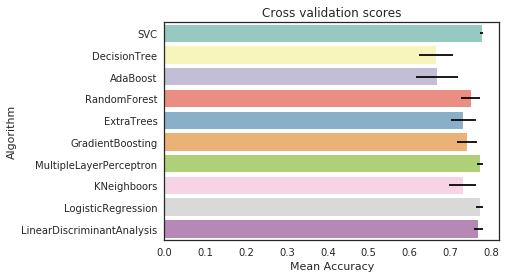

In [109]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [110]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.1, 0.2, 0.3,1.5,10]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   10.2s finished


In [111]:
gsadaDTC.best_score_

0.672627235213205

In [112]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [0.25],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   54.0s finished


0.7771664374140302

In [113]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [0.25],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


0.7716643741403026

In [114]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [10,20,30],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    9.6s finished


0.7771664374140302

In [115]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1,1.5],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:   58.7s finished


0.7771664374140302

In [116]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


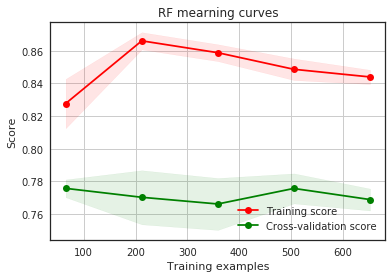

In [117]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


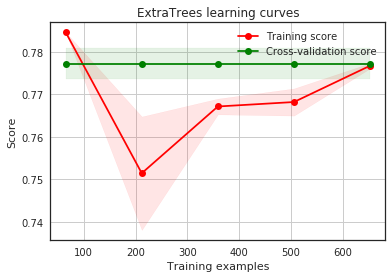

In [118]:
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


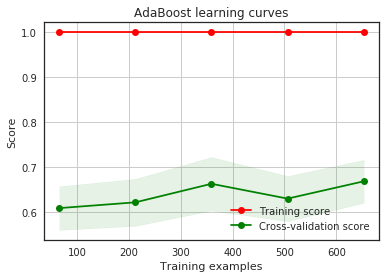

In [119]:
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


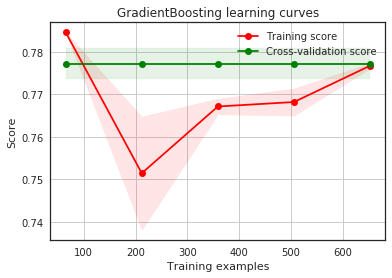

In [120]:
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


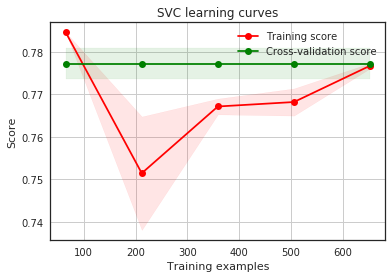

In [121]:
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)

In [122]:
import numpy as np
np.unique(Y_train)

array([0, 1])

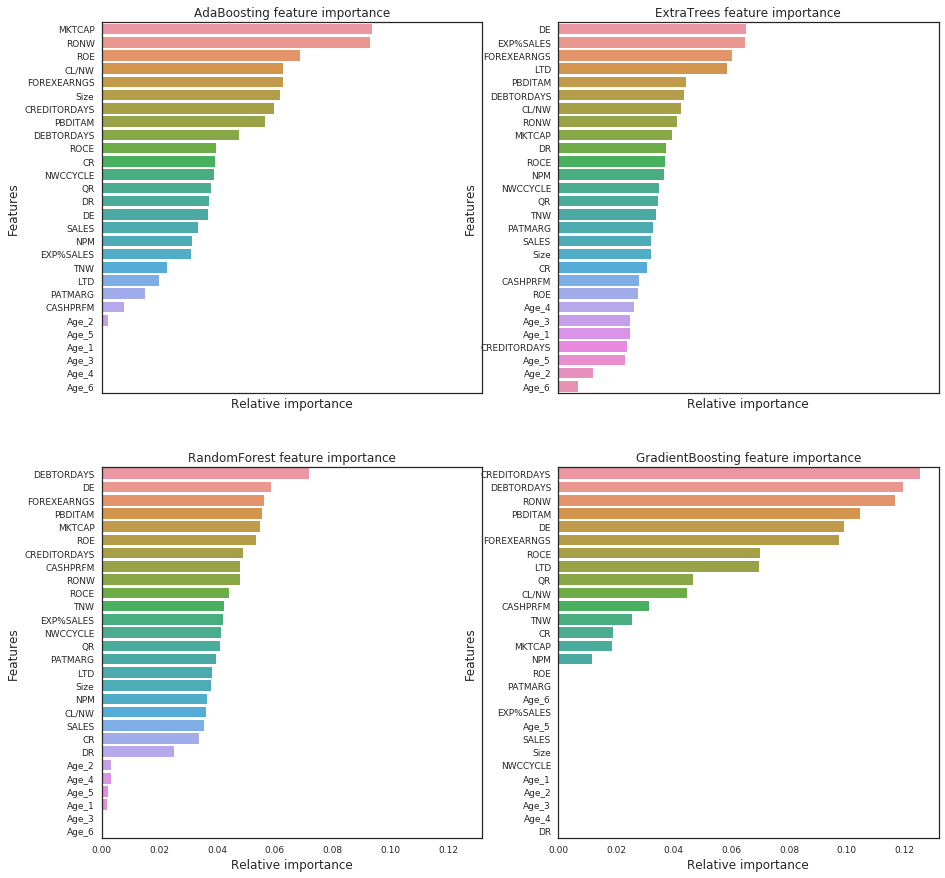

In [123]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [126]:
""""
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)
"""""

'"\ntest_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")\ntest_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")\ntest_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")\ntest_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")\ntest_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")\n\n\n# Concatenate all classifier results\nensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)\n\n\ng= sns.heatmap(ensemble_results.corr(),annot=True)\n'

In [ ]:

votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [ ]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)